In [ ]:
# Data Cleaning

In [2]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split

# Load the JSONL file into a DataFrame
file_path = "Cell_Phones_and_Accessories_5.json"

# Read the JSONL data
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))  # Load each JSON object
df = pd.DataFrame(data)

# Data Cleaning
# Drop rows with missing values
df.dropna(inplace=True)

# Standardize text fields
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]', '', regex=True)

# Convert 'reviewTime' to a datetime object
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Dataset Splitting
train, temp = train_test_split(df, test_size=0.2, random_state=42)  # 80% train
validation, test = train_test_split(temp, test_size=0.5, random_state=42)  # 10% validation, 10% test

# Save splits if needed
train.to_csv("train.csv", index=False)
validation.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)


In [4]:
# Check the number of rows in the dataset
print(f"Number of rows in the dataset: {df.shape[0]}")

# Display a single entry
print(df.iloc[0])  # Replace 0 with the desired row index to check a different entry

Number of rows in the dataset: 190920
reviewerID                                           A30TL5EWN6DFXT
asin                                                     120401325X
reviewerName                                              christina
helpful                                                      [0, 0]
reviewText        they look good and stick good i just dont like...
overall                                                         4.0
summary                                                  Looks Good
unixReviewTime                                           1400630400
reviewTime                                      2014-05-21 00:00:00
Name: 0, dtype: object


In [ ]:
# EDA

Statistical Summary:
             overall
count  190920.000000
mean        4.128253
std         1.223434
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


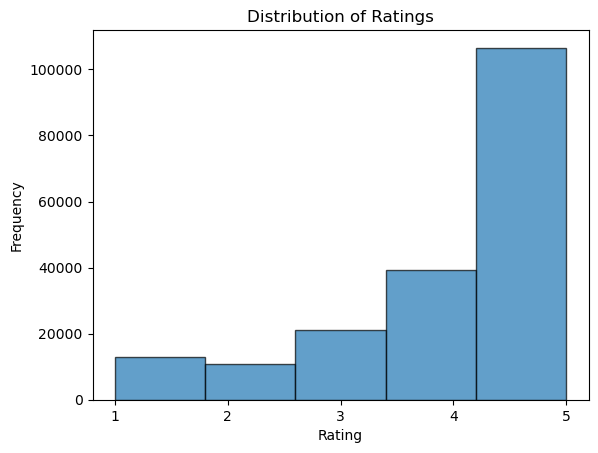

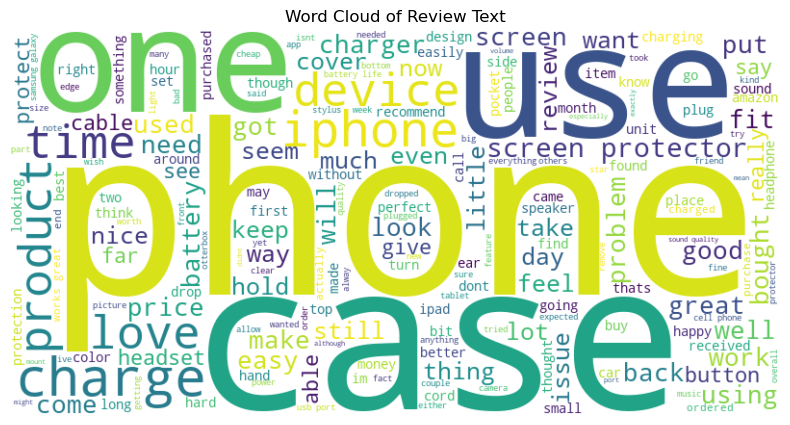

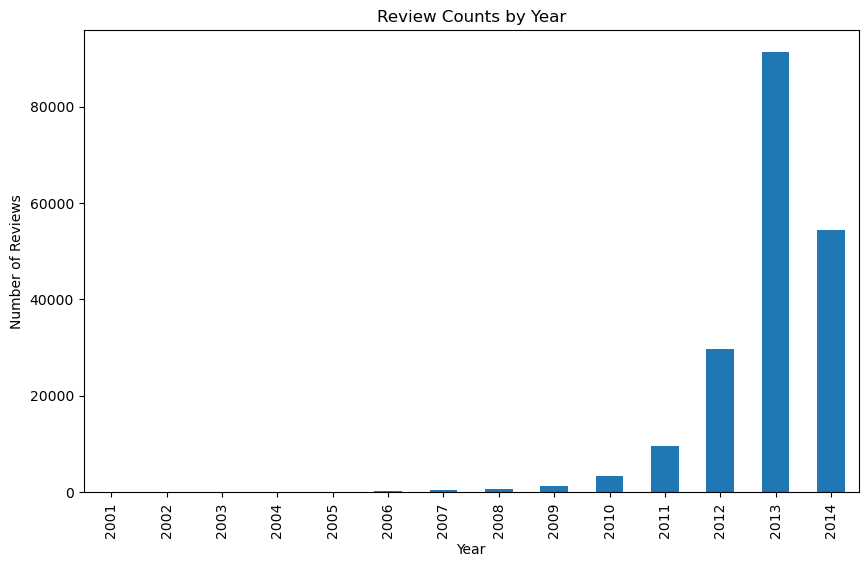

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Check basic statistics
print("Statistical Summary:")
print(df[['overall']].describe())  # 'overall' column is assumed to hold ratings

# **1. Distribution of Ratings**
plt.hist(df['overall'], bins=5, edgecolor='black', alpha=0.7)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))
plt.show()

# **2. Word Cloud for Review Text**
text_data = " ".join(review for review in df['reviewText'] if isinstance(review, str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Review Text")
plt.show()

# **3. Temporal Analysis of Reviews**
if 'reviewTime' in df.columns:
    df['reviewYear'] = df['reviewTime'].dt.year  # Extract year from the timestamp
    df['reviewYear'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
    plt.title("Review Counts by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Reviews")
    plt.show()
else:
    print("No 'reviewTime' column found for temporal analysis.")


